<a href="https://colab.research.google.com/github/jsef77/DACaseStudy/blob/main/Case_Study_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports and declarations
!pip install httpx
!pip install selectolax

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import httpx
from selectolax.parser import HTMLParser
from dataclasses import dataclass, asdict
import random

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Resources/evdataset.csv")
df_linkless = df.drop(['link'], axis=1)
df_combined = df_linkless.drop(['City - Cold Weather','Highway - Cold Weather','City - Mild Weather','Highway - Mild Weather'], axis=1)
dimensions = ["Length","Width","Height","Wheelbase"]
uniqueMakes = df_combined["Make"].unique()
df_mileagePerMake = df_combined[['Make','Combined - Cold Weather','Combined - Mild Weather']]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 


In [ ]:
df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# create list of models using the links
model_list = []
for link in list(df['link']):
  model = link[31:]
  if model not in model_list:
    model_list.append(model)
  else:
    continue

194

In [ ]:
user_agent_list = [
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 OPR/93.0.0.0',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36 Edge/17.17134',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.10240',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71'
]
user_agent = random.choice(user_agent_list)
headers = {'user-agent': user_agent}
client = httpx.Client(headers=headers)

price_list = []


# sort list of links for use with functions
link_list = list(df.link)
link_list_length = len(link_list)
for i in range (0, link_list_length):
  link_list[i] = link_list[i][24:]
  #print(link_list[i])

def get_html(car = str):
  url = f"https://ev-database.org/{car}" # grab url of the car argument
  resp = client.get(url)
  if "Request blocked" in HTMLParser(resp.text).text():
    raise Exception("Website Blocked Request!") # raises Exception if request is blocked
  else:
    return HTMLParser(resp.text) # returns html content

def get_car():
  for car in link_list: # sorts through list of all the links and returns each one
    html = get_html(car)
    print(html)    

def parse_price(html):
  pricediv = html.css("div#pricing td") # grab html element td within div with id pricing
  price = pricediv[1].css_first("td").text() # set price to the second td object in price
  print(price) # print that price 
  return(price)

def get_prices():
  for link in link_list: # loops through links and grabs price for each car, and writes it to a list
    user_agent = random.choice(user_agent_list) # selects random user agent
    html = get_html(link)    
    price = parse_price(html)
    price_list.append(price)
  print("List Complete!")

get_prices()

client.close()
print("Client Closed")

In [ ]:
#price_list = price_list
print(price_list)
print(len(price_list))

price_list_backup_post_scraped = ['£47,005', '£55,310', '£119,900', '£53,480', 'Not Available', 
                     '£32,000', '£38,970', '£120,900', '£51,765', '£120,900', '£42,925', 
                     'Not Available', '£58,350', '£23,835', '£35,000', '£45,400', '£31,600', 
                     '£30,995', '£114,750', '£84,500', '£53,605', '£91,406', '£48,930', 
                     'Not Available','£57,000', '£37,290', '£62,865', '£49,550', '£50,180', 
                     '£46,190', '£36,245', '£34,770', 'Not Available', 
                     '£31,795', 'Not Available', '£31,995', '£44,480', '£45,750', 
                     '£34,715', '£33,700', '£53,010', '£29,995', 'Not Available', 
                     '£61,595', '£47,510', '£49,100', '£72,830', 'Not Available', 
                     '£51,510', '£65,405', '£157,160', '£35,750', '£64,405', '£28,495', '£42,000', 
                     '£56,080', '£41,900', '£90,235', '£78,850', '£36,920', '£48,335', 
                     '£106,000', 'Not Available', 'Not Available', 'Not Available', 'Not Available', 
                     'Not Available', '£52,255', 'Not Available', '£38,720', '£30,450', 
                     '£29,435', 'Not Available', 'Not Available', '£34,945', '£40,000', '£30,995', '£57,115', 
                     '£116,905', '£70,035', 'Not Available', '£31,995', '£47,100', '£86,500', 
                     'Not Available', 'Not Available', 'Not Available', '£88,435', '£25,995', '£29,495', 
                     '£51,745', '£45,245', '£30,195', '£129,170', 'Not Available', 'Not Available', 
                     '£44,690', '£49,735', 'Not Available', '£74,345', '£62,035', '£32,795', 'Not Available', 
                     'Not Available', 'Not Available', '£65,080', '£107,305', '£115,000', '£76,450', 
                     'Not Available', 'Not Available', '£43,050', '£40,215', '£76,500', '£42,645', '£29,095', 
                     '£91,000', '£75,500', '£48,900', '£33,630', 'Not Available', 'Not Available', 
                     '£143,400', 'Not Available', '£45,000', 'Not Available', '£30,050', 'Not Available', 'Not Available', 
                     '£57,490', '£72,935', '£143,400', 'Not Available', '£77,305', '£84,000', '£54,275', 
                     '£55,570', '£31,995', '£57,990', 'Not Available', '£80,549', 'Not Available', '£32,085', '£55,310', 
                     '£36,990', '£77,345', '£31,935', '£35,995', '£66,350', '£65,405', 'Not Available', 
                     '£67,990', 'Not Available', '£43,780', '£63,835', '£102,160', 'Not Available', '£90,406', '£31,795', 
                     '£31,995', '£28,555', '£47,495', 'Not Available', '£107,000', '£37,445', '£108,305', 
                     'Not Available', '£46,450', '£74,635', 'Not Available', '£50,430', '£51,580', '£87,500', 
                     '£56,810', 'Not Available', '£74,540', '£31,000', '£61,490', 'Not Available', 'Not Available', 
                     'Not Available', '£50,830', '£65,795', 'Not Available', '£49,995', '£74,540', '£34,365', '£79,549', 
                     '£51,210', '£142,400', '£40,550', '£31,995', '£56,810', 'Not Available']

['£47,005', '£55,310', '£119,900', '£53,480', 'Not Available', '£32,000', '£38,970', '£120,900', '£51,765', '£120,900', '£42,925', 'Not Available', '£58,350', '£23,835', '£35,000', '£45,400', '£31,600', '£30,995', '£114,750', '£84,500', '£53,605', '£91,406', '£48,930', 'Not Available', '£57,000', '£37,290', '£62,865', '£49,550', '£50,180', '£46,190', '£36,245', '£34,770', 'Not Available', '£31,795', 'Not Available', '£31,995', '£44,480', '£45,750', '£34,715', '£33,700', '£53,010', '£29,995', 'Not Available', '£61,595', '£47,510', '£49,100', '£72,830', 'Not Available', '£51,510', '£65,405', '£157,160', '£35,750', '£64,405', '£28,495', '£42,000', '£56,080', '£41,900', '£90,235', '£78,850', '£36,920', '£48,335', '£106,000', 'Not Available', 'Not Available', 'Not Available', 'Not Available', 'Not Available', '£52,255', 'Not Available', '£38,720', '£30,450', '£29,435', 'Not Available', 'Not Available', '£34,945', '£40,000', '£30,995', '£57,115', '£116,905', '£70,035', 'Not Available', '£31,

In [ ]:
# Sort Price_List to int or 0 if Not Available 
i = 0
def price_list_to_int():
  for price in price_list:
    print(price)
    if price == "Not Available":
      price = 0
      price_list[i] = price
      i = i+1
    elif type(price) == str and "£" in price:
      price = price.strip("£")
      price = price.replace(",", "")
      price = pd.to_numeric(price)
      price_list[i] = price
      i = i+1
    elif price != int and price != float and price != 0:
      price_list[i] = pd.to_numeric(price)
      i = i+1
    else:
      print("Nothing Changed")
      i = i+1

# Prices

displays the price of all the different cars, in order

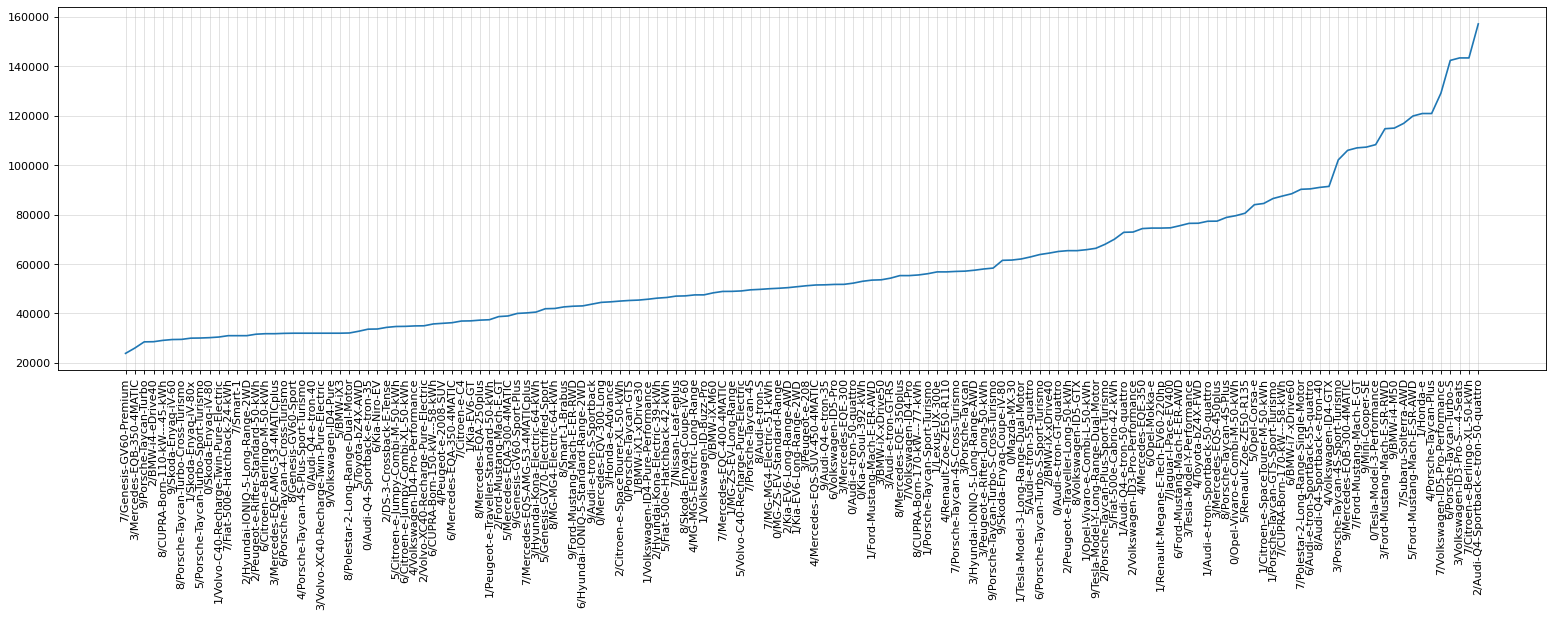

In [ ]:
dfPrices = pd.DataFrame()
dfPrices['Price'] = price_list
dfPrices['Model'] = model_list
dfPrices = df.join(dfPrices)

price_range = dfPrices.loc[dfPrices.Price > 0]

def plot_prices():
  plt.figure(figsize=(24, 6), dpi=80)
  plt.plot(price_range['Model'],(price_range['Price'].sort_values()))
  plt.xticks(rotation=90)
  plt.grid(visible=True, alpha=0.4)
  plt.show()

plot_prices()

# Average X per Brand

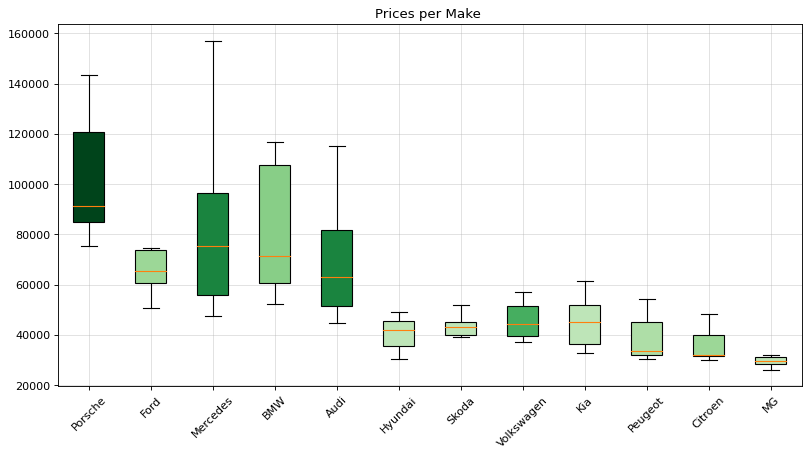

Omitted (low sample size): 
 {'CUPRA', 'Tesla', 'Renault', 'Hongqi', 'Fiat', 'DS', 'Mazda', 'JAC', 'Lexus', 'Mini', 'Smart', 'Toyota', 'Volvo', 'Nissan', 'Seres', 'Honda', 'Dacia', 'Genesis', 'Jaguar', 'Opel', 'Subaru', 'Polestar'}


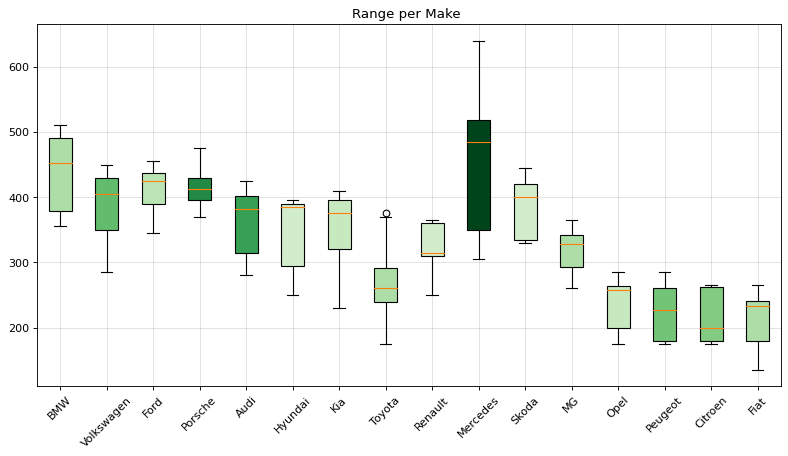

Omitted (low sample size): 
 {'CUPRA', 'Tesla', 'Hongqi', 'DS', 'Mazda', 'JAC', 'Lexus', 'Mini', 'Smart', 'Volvo', 'Nissan', 'Seres', 'Honda', 'Dacia', 'Genesis', 'Jaguar', 'Subaru', 'Polestar'}


In [ ]:
listRange = []
listPrices = []
uniqueMakesSet = set(uniqueMakes)

def list_value_by_make(make, target_value, output_list, length_check=False):
  df_x = dfPrices[df.Make.str.contains(make)] 
  x = df_x[target_value].values.tolist()
  if len(x) < length_check and length_check != False: # if certain make of car has less that length_check, set that make's list of values to 0
    output_list.append(0)
  else:
    output_list.append(x)

# remove zeroes from list of values, and then set entire list to 0 if length of list < 5
def boxplot_valuelist_prepare(chosen_list):
  count = 0
  return_list = []
  for values in chosen_list:
    values = [i for i in values if i != 0]
    if len(values) < 5:
      values = 0
    return_list.append(values)
    count = count +1
  return return_list


def color_by_reliability(dfX, axis=str, colourmap = str):
  Colours = plt.get_cmap(colourmap)
  value_lengths = [len(i) for i in dfX[axis]] # gets the list of lengths of each value list in chosen axis of chosen data frame  
  normalised_lengths = Colours([float(i)/max(value_lengths) for i in value_lengths]) #normalises these values between 0 - 1
  return normalised_lengths
  

# plot graph
def plot_X_per_make(dfX, axis=str):
  missing_makes = uniqueMakesSet.difference(dfX.Make)
  dfX = dfX.sort_values([axis], ascending = False)
  plt.figure(figsize=(12, 6), dpi=80)

  boxplot = plt.boxplot(dfX[axis], labels = dfX['Make'], patch_artist=True)      
  plt.title(label=f"{axis} per Make ")
  plt.xticks(rotation=45)

  # colouring
  colors = color_by_reliability(dfX, axis, 'Greens')  
  for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

  plt.grid(visible=True, alpha=0.4)  
  plt.show()
  print(f"Omitted (low sample size): \n {missing_makes}")


# sorting values by make
for make in uniqueMakes:
  list_value_by_make(make,"Electric Range",listRange,5)
  list_value_by_make(make,"Price",listPrices)

# making dataframes ready for box plot
df_mileage_per_make = pd.DataFrame({'Make': uniqueMakes,'Range': listRange})
df_mileage_per_make = df_mileage_per_make[(df_mileage_per_make.Range != 0)] # omit results where data list count < length_check
df_price_per_make = pd.DataFrame({'Make': uniqueMakes, 'Prices': boxplot_valuelist_prepare(listPrices)})
df_price_per_make = df_price_per_make[(df_price_per_make.Prices != 0)]

plot_X_per_make(df_price_per_make, 'Prices')
plot_X_per_make(df_mileage_per_make, 'Range')

# NOTES:
# reliability data could most likely be calculated more simply by adding a third coloumn to the data frames with the total number of values in the Prices column for that make

This box plot shows us:


1.   Mercedes has the best average mileage performing car
2.   Mercedes has the largest range of milages for cars

***Brands with less than 5 cars have been omitted***



# Charge Speeds per Make

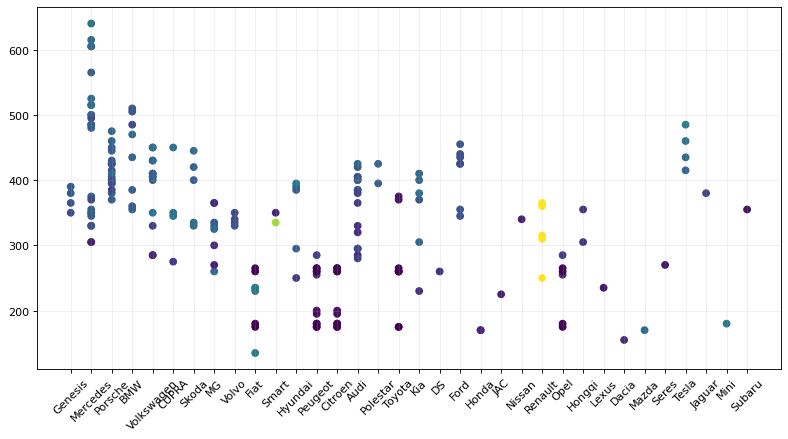

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)

plt.scatter(x = df['Make'], y=df['Electric Range'], c=df['Charge Speed'])
plt.xticks(rotation=45)
plt.grid(visible=True, alpha=0.2)
plt.show()

This scatter graph shows us:


1.   The mileage/Charge Speed
2.   Renault are the best charging cars, albeit with a low mileage



Given that price has not been mentioned nor is availalbe in the data, it is assumed that the company will want to look at Mercedes as they have some of the best mileages

This will ask the user for input, wich deicdes whether a graph for City mileage or Highway mileage will be drawn.

# Top Milages (Cold/Mild)

'City' or 'Highway' Travel? city


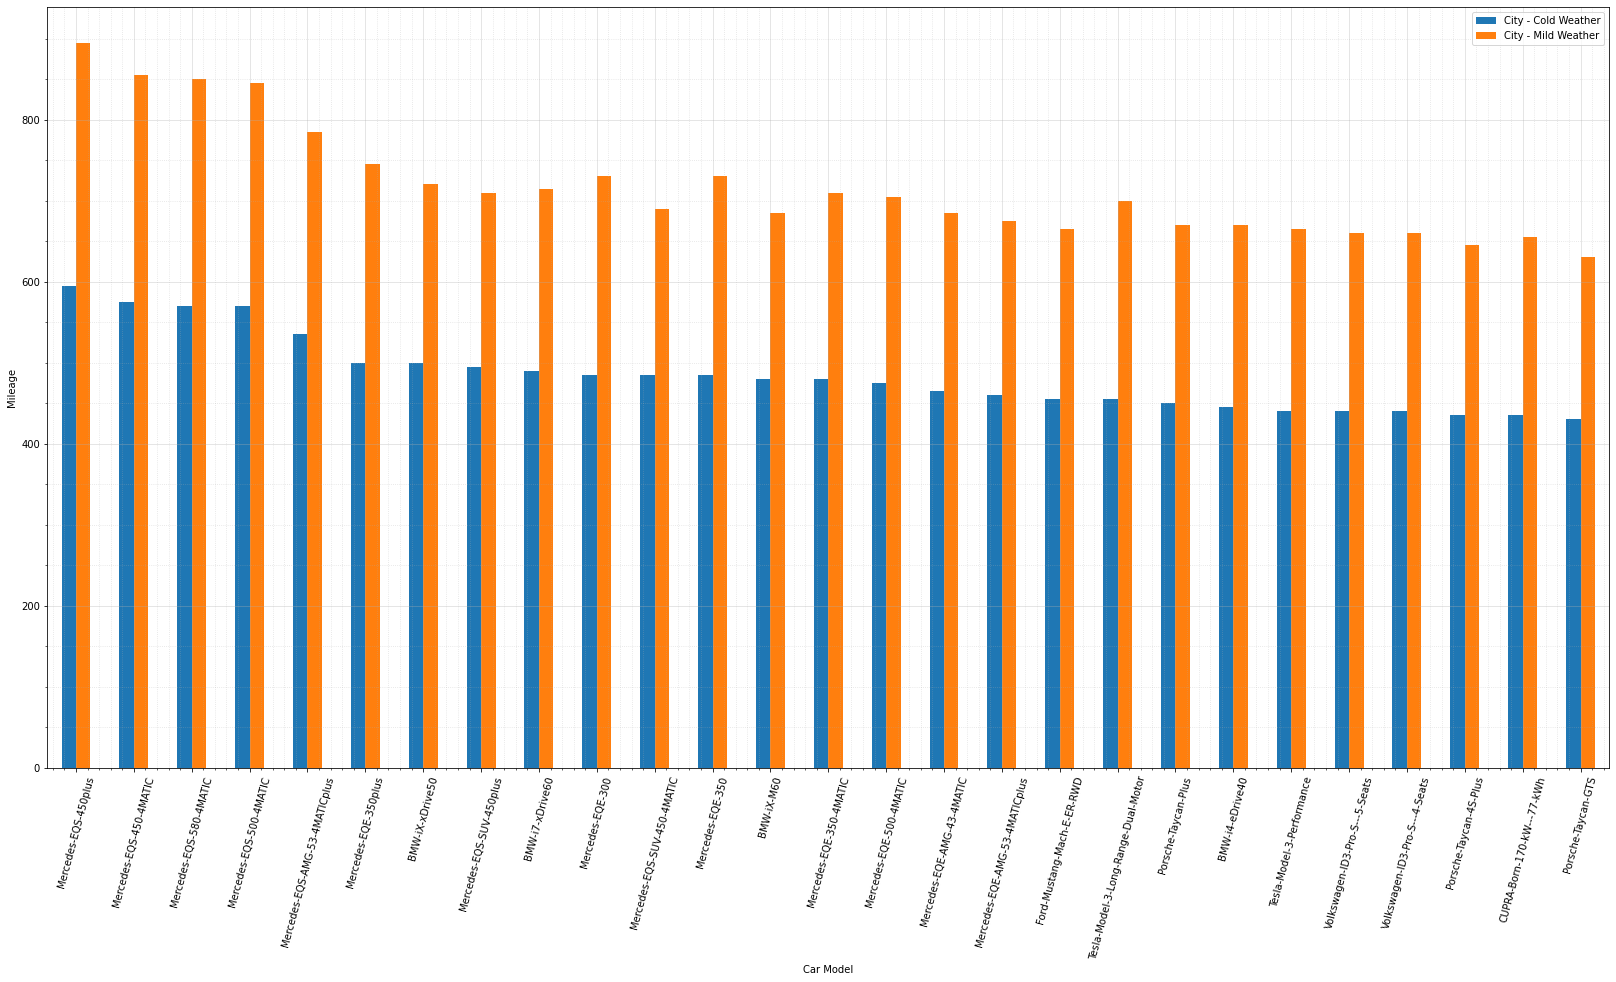

In [ ]:
answrs_loc = ['City', 'Highway']
dfMakeSel = df[df[('Electric Range')] >= 450].sort_values(['City - Cold Weather'], ascending = False) # select only the cars with an electric range of above 450

def mercMiles(loc): 

  if loc in answrs_loc:

    dfMakeSelFiltered = dfMakeSel.filter(['link',
                                          loc+' - Cold Weather', 
                                          loc+' - Mild Weather']).set_index(dfMakeSel['link'].str.slice(start=33))
    dfMakeSelFiltered.plot(kind='bar', figsize=(28,14)).minorticks_on()
    plt.ylabel("Mileage")
    plt.xlabel("Car Model")
    plt.grid(visible=True, alpha=0.4)
    plt.grid(which='minor', alpha=0.4, linestyle=':')
    plt.xticks(rotation = 75)
    plt.show()
        
  else:
    print("Please input correct make and City/Highway")
    return

mercMiles(input("'City' or 'Highway' Travel? ").title())
#mercMiles('City')

This is the same as above, however will include a wider range of car brands

This will ask the user for input, wich deicdes whether a graph for City mileage or Highway mileage will be drawn.

# First Conclusion
Looking at the data, is quickly became apparant that Mercedes were likely to offer the car with the best mileage in almost all categories.

The Mercedes-EQS-450plus came out on top, with superior range in both the City and Highway.

EDIT: After the session where Mercy revealed that this was actually a real company, with potentially more incentive to get a car with a cargo volume, there's more oppurtunity for further analysis as to what car might be the best.

# Failed/Old Code

In [ ]:

#attempt to scrape html for car prices. failed because of denied access after using it too much

import requests
from bs4 import BeautifulSoup

url='https://ev-database.org/car/1756/Ford-Mustang-Mach-E-ER-AWD'
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')
scraped_price = soup.find('main').find('div')
print(scraped_price)
# Output:
# Prints all blog tiles on the page

<div class="sub-header">
<h1>Request blocked</h1>
</div>


In [ ]:
# show combined mileage per make on graph
# cycle through unique names, and create array for each unique make
#data_boxPlotCold = []
#data_boxPlotMild = []
#n = 0
#print(data_boxPlotCold)

#for i in uniqueMakes:  #runs through each unique make, and assigns cold/mild combined mileage to array for use in box plot

  #df_MakesBool = df_combined[df.Make.str.contains(i)] #df_MakesBool becomes solely the current [i] Make
  #Co = df_MakesBool["Combined - Cold Weather"].values.tolist()
  #Mi = df_MakesBool["Combined - Mild Weather"].values.tolist()

  #data_boxPlotCold.append(Co) #dataset of cold weather mileage written to data_boxPlotCold ready for box plot
  #data_boxPlotMild.append(Mi)

#sns.boxplot(data=data_boxPlotCold,) #need to remove values within data list that contain <5 values for best boxplot



In [ ]:
#cleaning & organising dfs

df_linkless = df.drop(['link'], axis=1)
df_combined = df_linkless.drop(['City - Cold Weather','Highway - Cold Weather','City - Mild Weather','Highway - Mild Weather'], axis=1)
dimensions = ["Length","Width","Height","Wheelbase"]
uniqueMakes = df_combined["Make"].unique()
df_mileagePerMake = df_combined[['Make','Combined - Cold Weather','Combined - Mild Weather']]

#df_mileagePerMake.sort_values("Make")
#df_combined.sort_values("Make")
#df_combined

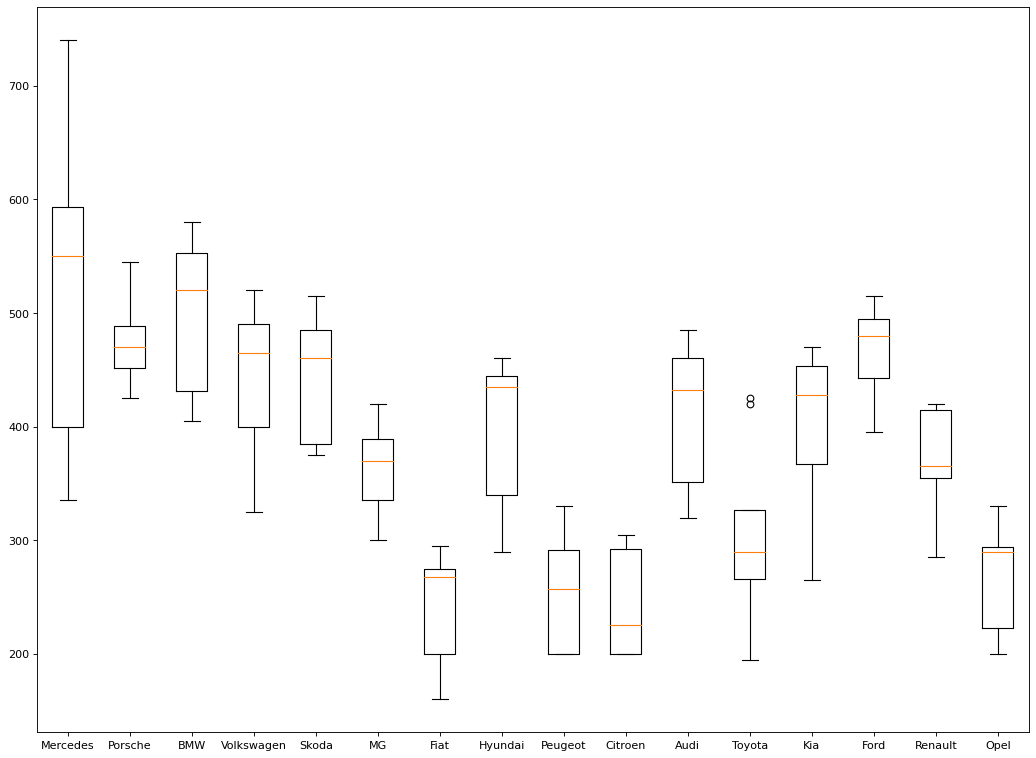

In [ ]:
listCold = [];listMild = []

def func_PlotPrep(i,y,z):
  df_x = df_combined[df.Make.str.contains(i)] 
  x = df_x[y].values.tolist()

  if len(x) < 5:
    z.append(0)
  else:
    z.append(x)

for i in uniqueMakes:
  func_PlotPrep(i,"Combined - Cold Weather",listCold)
  func_PlotPrep(i,"Combined - Mild Weather",listMild)

dfMileages = pd.DataFrame({'Make': uniqueMakes,
                                 'mileageM': listMild, 
                                 'mileageC':listCold})
dfMileages = dfMileages[(dfMileages.mileageM != 0) & (dfMileages.mileageC != 0)] # omit results where data list count < 5

plt.figure(figsize=(16, 12), dpi=80)
plt.boxplot(dfMileages['mileageM'], labels = dfMileages['Make']) #labels=uniqueMakes.tolist()
plt.show()



# TO DO:
# print which boxes have been ommitted
# colour plots according to reliability? (amount of data)
# clean up presentation

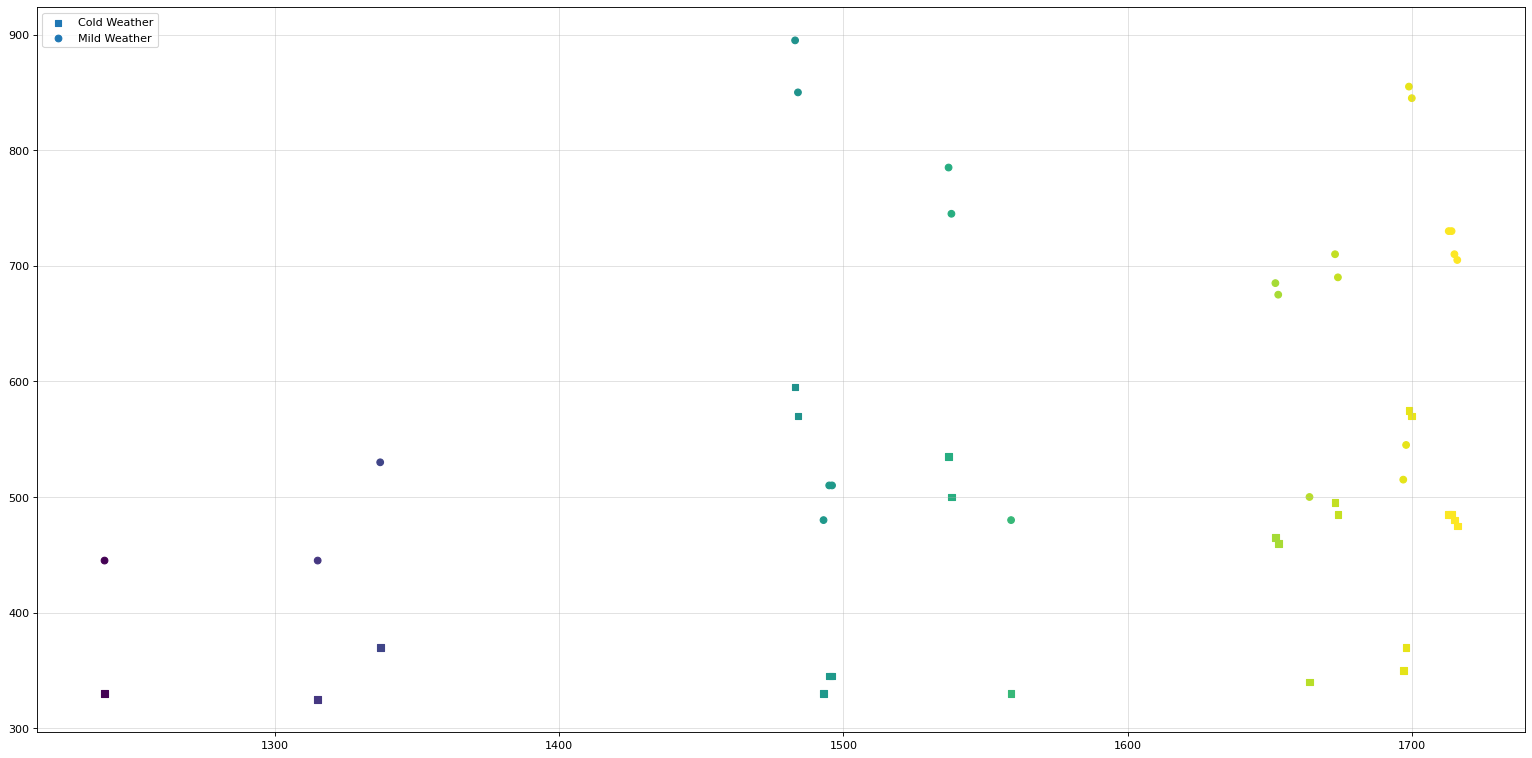

In [ ]:
dfMercCity = df[df.Make == "Mercedes"]
plt.figure(figsize=(24, 12), dpi=80)

plt.scatter(x=dfMercCity['id'], y=dfMercCity['City - Cold Weather'], c=dfMercCity['id'], marker="s", label='Cold Weather')
plt.scatter(x=dfMercCity['id'], y=dfMercCity['City - Mild Weather'], c=dfMercCity['id'], marker="o", label='Mild Weather')
plt.legend(loc='upper left')
plt.grid(visible=True, alpha=0.4)
plt.show()

In [ ]:
answrs_loc = ['City', 'Highway']
dfMakeSel = df[df.Make == "Mercedes"]

def mercMiles(loc): 

  if loc in answrs_loc:

    dfMakeSelFiltered = dfMakeSel.filter(['link',
                                          loc+' - Cold Weather', 
                                          loc+' - Mild Weather']).set_index(dfMakeSel['link'])#.str.slice(start=42)

    dfMakeSelFiltered.plot(kind='bar', figsize=(20,8))
    plt.ylabel("Mileage")
    plt.xlabel("Car Model")
    plt.xticks(rotation = 65)
    plt.show()
        
  else:
    print("Please input correct make and City/Highway")
    return

mercMiles(input("'City' or 'Highway' Travel? ").title())

KeyboardInterrupt: ignored

In [ ]:
listRange = []

def func_PlotPrep(i,y,z,l):
  df_x = df_combined[df.Make.str.contains(i)] 
  x = df_x[y].values.tolist()
  if len(x) < l:
    z.append(0)
  else:
    z.append(x)

for i in uniqueMakes:
  func_PlotPrep(i,"Electric Range",listRange,5)

dfMileages = pd.DataFrame({'Make': uniqueMakes,'Range': listRange})
dfMileages = dfMileages[(dfMileages.Range != 0)] # omit results where data list count < 5


def plot_mileage_per_make():
  plt.figure(figsize=(16, 12), dpi=80)
  plt.boxplot(dfMileages['Range'], labels = dfMileages['Make']) #labels=uniqueMakes.tolist()
  plt.xticks(rotation=45)
  plt.show()

plot_mileage_per_make()


# TO DO:
# print which boxes have been ommitted
# colour plots according to reliability? (amount of data)
# clean up presentation